<a href="https://colab.research.google.com/github/omidkhalafbeigi/rnn_from_scratch/blob/main/RNN_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from sympy import * 
from sympy.functions import *
from sklearn.preprocessing import MinMaxScaler
import math
import numpy as np
from matplotlib import pyplot as plt

In [7]:
def sigmoid(x):
  return 1 / (1 + exp(-x))

In [173]:
data = list()
x = list()

for i in range(-720, 720):
  rad = (i * math.pi) / 180
  x.append(rad)
  data.append(math.sin(rad))

x = np.array(x)
data = np.array(data)

timesteps = 2
X_train = list()
y_train = list()

for i in range(timesteps, data.shape[0], 1):
  X_train.append(data[i - timesteps:i])
  y_train.append(data[i])

X_train = MinMaxScaler().fit_transform(np.array(X_train))
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.array(y_train).reshape(-1, 1)

In [182]:
x1, w1x, b1, w1h, y, v1, v2, c, w2x, b2, x2, w2h, m, l, h11_o, h12_o, h21_o, h22_o, y_o, observed = symbols('x1 w1x b1 w1h y v1 v2 c w2x b2 x2 w2h m l h11_o h12_o h21_o h22_o y_o observed')

In [183]:
h11 = sigmoid(x1 * w1x + b1)
h12 = sigmoid(x2 * w1x + b1 + w1h * h11)
h21 = sigmoid(x1 * w2x + b2)
h22 = sigmoid(x2 * w2x + b2 + w2h * h21)
y = v1 * h12 + v2 * h22 + c
error = (1 / m) * ((y - l) ** 2)

delta_b1 = diff(error, b1)
delta_w1x = diff(error, w1x)
delta_w1h = diff(error, w1h)
delta_w2x = diff(error, w2x)
delta_b2 = diff(error, b2)
delta_w2h = diff(error, w2x)
delta_v1 = diff(error, v1)
delta_v2 = diff(error, v2)
delta_c = diff(error, c)

all_vars = [x1, w1x, b1, w1h, v1, v2, c, w2x, b2, x2, w2h, m, l, h11_o, h12_o, h21_o, h22_o, y_o, observed]
delta_b1 = lambdify(all_vars, delta_b1)
delta_w1x = lambdify(all_vars, delta_w1x)
delta_w1h = lambdify(all_vars, delta_w1h)
delta_w2x = lambdify(all_vars, delta_w2x)
delta_b2 = lambdify(all_vars, delta_b2)
delta_w2h = lambdify(all_vars, delta_w2h)
delta_v1 = lambdify(all_vars, delta_v1)
delta_v2 = lambdify(all_vars, delta_v2)
delta_c = lambdify(all_vars, delta_c)

h11 = lambdify([x1, w1x, b1], sigmoid(x1 * w1x + b1))
h12 = lambdify([x2, w1x, b1, w1h, h11_o], sigmoid(x2 * w1x + b1 + w1h * h11_o))
h21 = lambdify([x1, w2x, b2], sigmoid(x1 * w2x + b2))
h22 = lambdify([x2, w2x, b2, w2h, h21_o], sigmoid(x2 * w2x + b2 + w2h * h21_o))
y = lambdify([v1, h12_o, v2, h22_o, c], v1 * h12_o + v2 * h22_o + c)
error = lambdify([m, y_o, observed], (1 / m) * ((y_o - observed) ** 2))

In [184]:
w1x = np.random.rand(1, 1)
w1h = np.random.rand(1, 1)
b1 = np.random.rand(1, 1)
w2x = np.random.rand(1, 1)
w2h = np.random.rand(1, 1)
b2 = np.random.rand(1, 1)
c = np.random.rand(1, 1)
v1 = np.random.rand(1, 1)
v2 = np.random.rand(1, 1)
m = 1
lr = 0.001

In [ ]:
for epoch in range(100):
  for index in range(X_train.shape[0]):
    sample = X_train[index]
    h11_o = h11(sample[0], w1x, b1)
    h12_o = h12(sample[1], w1x, b1, w1h, h11_o)
    h21_o = h21(sample[0], w2x, b2)
    h22_o = h22(sample[1], w2x, b2, w2h, h21_o)
    y_o = y(v1, h12_o, v2, h22_o, c)
    e = error(m, y_o, y_train[index])

    l = y_train[index]
    w1x -= lr * (delta_w1x(sample[0], w1x, b1, w1h, v1, v2, c, w2x, b2, sample[1], w2h, m, l, h11_o, h12_o, h21_o, h22_o, y_o, y_train[index]))
    w1h -= lr * (delta_w1h(sample[0], w1x, b1, w1h, v1, v2, c, w2x, b2, sample[1], w2h, m, l, h11_o, h12_o, h21_o, h22_o, y_o, y_train[index]))
    b1 -= lr * (delta_b1(sample[0], w1x, b1, w1h, v1, v2, c, w2x, b2, sample[1], w2h, m, l, h11_o, h12_o, h21_o, h22_o, y_o, y_train[index]))
    w2x -= lr * (delta_w2x(sample[0], w1x, b1, w1h, v1, v2, c, w2x, b2, sample[1], w2h, m, l, h11_o, h12_o, h21_o, h22_o, y_o, y_train[index]))
    w2h -= lr * (delta_w2h(sample[0], w1x, b1, w1h, v1, v2, c, w2x, b2, sample[1], w2h, m, l, h11_o, h12_o, h21_o, h22_o, y_o, y_train[index]))
    b2 -= lr * (delta_b2(sample[0], w1x, b1, w1h, v1, v2, c, w2x, b2, sample[1], w2h, m, l, h11_o, h12_o, h21_o, h22_o, y_o, y_train[index]))
    c -= lr * (delta_c(sample[0], w1x, b1, w1h, v1, v2, c, w2x, b2, sample[1], w2h, m, l, h11_o, h12_o, h21_o, h22_o, y_o, y_train[index]))
    v1 -= lr * (delta_v1(sample[0], w1x, b1, w1h, v1, v2, c, w2x, b2, sample[1], w2h, m, l, h11_o, h12_o, h21_o, h22_o, y_o, y_train[index]))
    v2 -= lr * (delta_v2(sample[0], w1x, b1, w1h, v1, v2, c, w2x, b2, sample[1], w2h, m, l, h11_o, h12_o, h21_o, h22_o, y_o, y_train[index]))

  print(f'Epoch: {epoch} - Error: {e}')


In [190]:
pred = list()
for sample in X_train:
  h11_o = h11(sample[0], w1x, b1)
  h12_o = h12(sample[1], w1x, b1, w1h, h11_o)
  h21_o = h21(sample[0], w2x, b2)
  h22_o = h22(sample[1], w2x, b2, w2h, h21_o)
  y_o = y(v1, h12_o, v2, h22_o, c)
  pred.append(y_o)

pred = np.array(pred)
pred = np.reshape(pred, (pred.shape[0],))

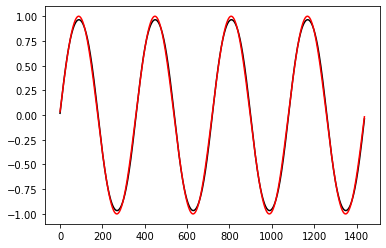

In [193]:
plt.plot(pred, 'black')
plt.plot(y_train, 'red')
plt.show()